IMPORTING NECESSARY 

In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Data collection & Processing

In [294]:
train_data = pd.read_csv("https://raw.githubusercontent.com/ViyyapuManikanta/For-the-minor-project/main/train(1).csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/ViyyapuManikanta/For-the-minor-project/main/test.csv")

In [295]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [296]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [297]:
train_data.shape

(891, 12)

In [298]:
test_data.shape

(418, 11)

In [299]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [300]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Checking for missing values

In [301]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [302]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [303]:
# repalcing the missing values in age column wiht mean value
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)

In [304]:
# finding the mode value of 'Embarked' column in train_data 
print(train_data['Embarked'].mode())

0    S
dtype: object


In [305]:
print(train_data['Embarked'].mode()[0])

S


In [306]:
# replacing the missing the value in 'Embarked column wiht mode value
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [307]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [308]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Data Analysis

In [309]:
# getting some statistical measures about the data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [310]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [311]:
# finding the number of survived and not survived
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Removing the unnecessary columns from both the train and test data inorder to predict the survived list

In [312]:
train_data.drop(['Cabin','Name','Ticket','Fare','PassengerId'], axis=1, inplace=True)
test_data.drop(['Cabin','Name','Ticket','Fare'],axis=1, inplace=True)

In [313]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [314]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S


Data visualization

In [315]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


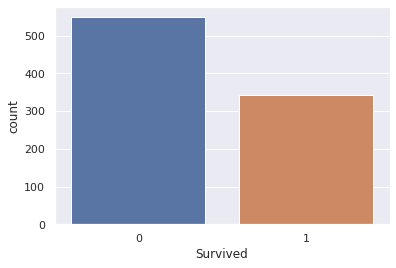

In [316]:
# making a count plot for 'survived' column
sns.countplot('Survived', data=train_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


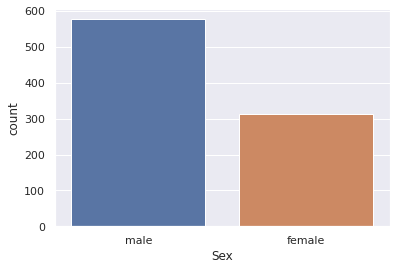

In [317]:
# making the count plot for 'Sex' column
sns.countplot('Sex', data=train_data)

In [318]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


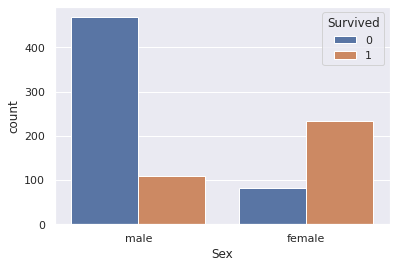

In [319]:
# number of surviver gender vise
sns.countplot('Sex',hue='Survived',data=train_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


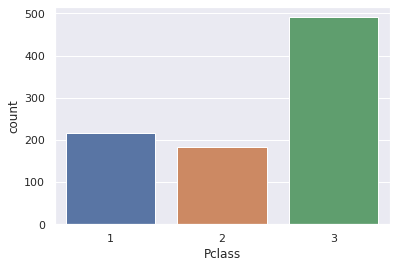

In [320]:
# making the count plot for 'Pclass' column
sns.countplot('Pclass', data=train_data)

In [321]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


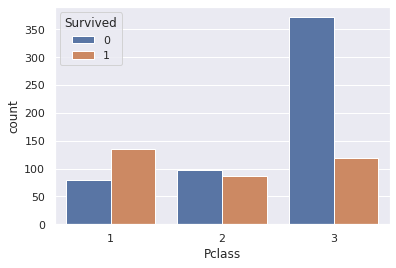

In [322]:
# number of surviver Pclass vise
sns.countplot('Pclass',hue='Survived',data=train_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


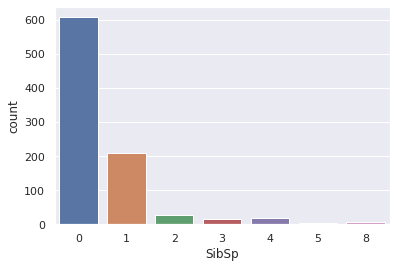

In [323]:
# making the count plot for 'SibSp' column
sns.countplot('SibSp', data=train_data)

In [324]:
train_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


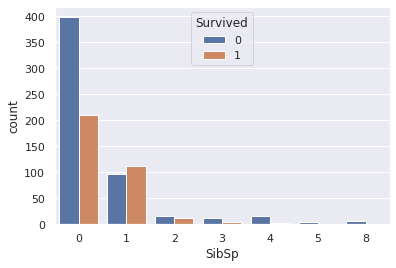

In [325]:
# number of surviver SibSp vise
sns.countplot('SibSp',hue='Survived',data=train_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


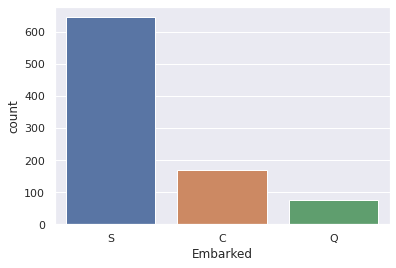

In [326]:
# making a count plot for 'Embarked' column
sns.countplot('Embarked', data=train_data)

In [327]:
train_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


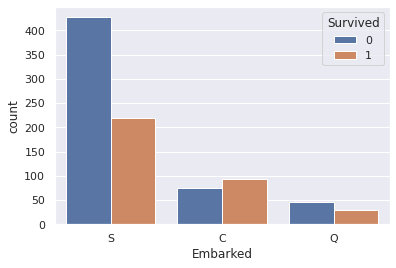

In [328]:
# number of surviver Embarked vise
sns.countplot('Embarked',hue='Survived',data=train_data)

Data preparation for fitting the model

In [329]:
# importing necessary libraries for preparing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [330]:
lben = LabelEncoder()
train_data['Sex'] = lben.fit_transform(train_data['Sex'].values)
train_data['Embarked'] = lben.fit_transform(train_data['Embarked'].values)

In [331]:
test_data['Sex'] = lben.fit_transform(test_data['Sex'].values)
test_data['Embarked'] = lben.fit_transform(test_data['Embarked'].values)

In [332]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [333]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,1,34.5,0,0,1
1,893,3,0,47.0,1,0,2
2,894,2,1,62.0,0,0,1
3,895,3,1,27.0,0,0,2
4,896,3,0,22.0,1,1,2


In [334]:
X_train = train_data.iloc[:,1:7]
Y_train = train_data.loc[:, 'Survived']
X_test = test_data.drop('PassengerId',axis=1)

In [335]:
sc_object = StandardScaler()
X_train = sc_object.fit_transform(X_train)
X_test = sc_object.transform(X_test)

Choosing the high prediction accuracy having model

In [336]:
# importing the libraries for Machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [337]:
# Logistic Regression model
l_regression = LogisticRegression()
l_regression.fit(X_train , Y_train)
accuracy_score = round(l_regression.score(X_train, Y_train) * 100, 2)
print('Accuracy for logistic regression model is:',accuracy_score)

Accuracy for logistic regression model is: 80.36


In [338]:
# Decision Tree model
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, Y_train)
dtree_score = round(d_tree.score(X_train, Y_train) * 100, 2)
print('Accuracy for decision tree model is:',dtree_score)

Accuracy for decision tree model is: 93.71


In [339]:
# RandomForest model
r_forest = RandomForestClassifier(n_estimators = 100, criterion ='entropy', random_state = 0)
r_forest.fit(X_train, Y_train)
rf_score = round(r_forest.score(X_train,Y_train) * 100, 2)
print('Accuracy for Random Forest Model is:',rf_score)

Accuracy for Random Forest Model is: 93.71


 Here we can see that DecisionTree & RandomForest Classifiers have highest and equal accuracy, so that i am choosing RandomForestclassifier

PREDICTION WITH HELP OF RANDOM FOREST MODEL

In [340]:
# using test values
final_prediction = r_forest.predict(X_test)

In [341]:
# inserting the predtiction into test_data
output_data = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': final_prediction})

In [342]:
output_data.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,1
7,899,0
8,900,0
9,901,0
